#  Building a Basic Recommendation System

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
credits = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies = pd.read_csv('tmdb_5000_movies.csv')

In [5]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [6]:
print ('Credits:', credits.shape)
print ('Movies:', movies.shape)

Credits: (4803, 4)
Movies: (4803, 20)


In [7]:
credits_column_name = credits.rename(index = str, columns = {'movie_id': 'id'})
movies_merge = movies.merge(credits_column_name, on ='id')

In [8]:
movie_cleaned = movies_merge.drop(columns = ['homepage', 'title_x', 'title_y', 'status', 'production_countries'])
movie_cleaned.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [9]:
movie_cleaned.isnull().sum()

budget                    0
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  3
popularity                0
production_companies      0
release_date              1
revenue                   0
runtime                   2
spoken_languages          0
tagline                 844
vote_average              0
vote_count                0
cast                      0
crew                      0
dtype: int64

In [10]:
movie_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   release_date          4802 non-null   object 
 10  revenue               4803 non-null   int64  
 11  runtime               4801 non-null   float64
 12  spoken_languages      4803 non-null   object 
 13  tagline               3959 non-null   object 
 14  vote_average          4803 non-null   float64
 15  vote_count           

#Using Weighted average for each movie's Average Rating


In [11]:
v = movie_cleaned['vote_count']
r = movie_cleaned['vote_average']
c = movie_cleaned['vote_average'].mean()
m = movie_cleaned['vote_count'].quantile(0.75)


In [12]:
print('v:', v.shape)
print('r:', r.shape)
print('c:', c)
print('m:', m)

v: (4803,)
r: (4803,)
c: 6.092171559442016
m: 737.0


In [13]:
movie_cleaned['weighet_average'] = ((r*v) + (c*m)) / (v+m)

In [14]:
movie_cleaned.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighet_average
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.134875
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.786315


In [15]:
movie_sort_ranking = movie_cleaned.sort_values('weighet_average',ascending=False)
movie_sort_ranking[['original_title', 'vote_count', 'vote_average', 'weighet_average', 'popularity']].head(5)

,original_title,vote_count,vote_average,weighet_average,popularity
1881,The Shawshank Redemption,8205,8.5,8.301547,136.747729
3337,The Godfather,5893,8.4,8.143459,143.659698
662,Fight Club,9413,8.3,8.139688,146.757391
3232,Pulp Fiction,8428,8.3,8.122458,121.463076
65,The Dark Knight,12002,8.2,8.078054,187.322927


(4.1, 8.716624017140932)

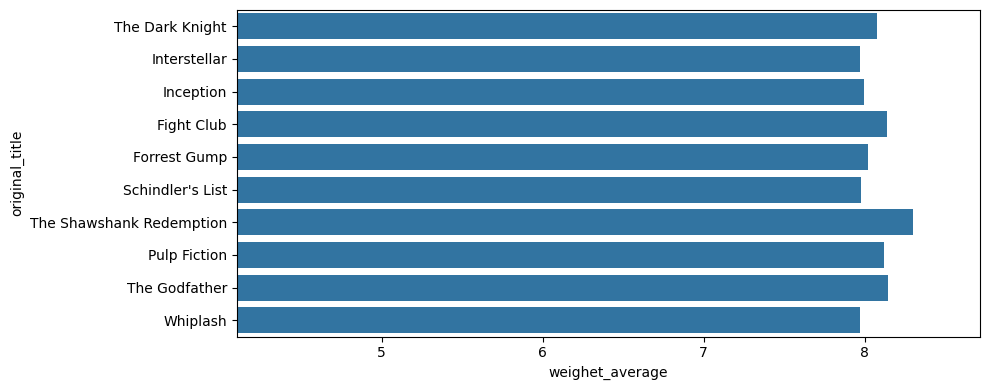

In [16]:
import matplotlib.pyplot as plt

weight_average = movie_cleaned.sort_values('weighet_average',ascending=False)
plt.figure(figsize=(10,4))
axist1 =sns.barplot(x=weight_average['weighet_average'], y = weight_average['original_title'].head(10), data = weight_average)
plt.tight_layout()
plt.xlim(4.10)


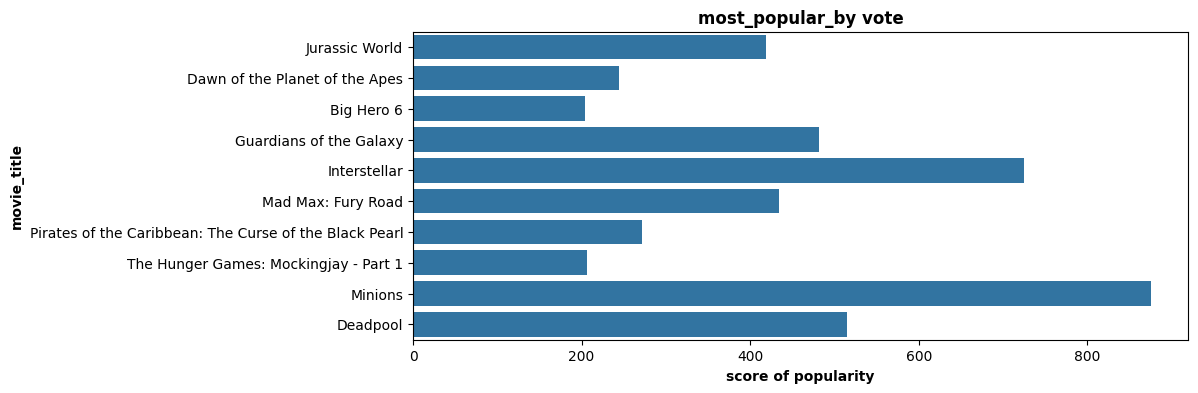

In [17]:
popularity = movie_sort_ranking.sort_values('popularity',ascending=False)
plt.figure(figsize = (10,4))
ax = sns.barplot(x = popularity['popularity'], y = popularity['original_title'].head(10), data = popularity)
plt.title('most_popular_by vote',weight = 'bold')
plt.xlabel('score of popularity',weight = 'bold')
plt.ylabel('movie_title', weight = 'bold')
plt.savefig('best popularity.png')

In [18]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
movier_scale = scale.fit_transform(movie_cleaned[['weighet_average', 'popularity']])
movie_normalized = pd.DataFrame(movier_scale, columns = ['weighet_average', 'popularity'])
movie_normalized.head(12)

,weighet_average,popularity
0,0.665509,0.171815
1,0.565575,0.158846
2,0.417706,0.122635
3,0.766494,0.128272
4,0.368227,0.050169
5,0.320879,0.132141
6,0.673574,0.055600
7,0.678841,0.153360
8,0.695693,0.112937
9,0.264828,0.177928


In [19]:
movie_cleaned[['normalized_weight_average','normalized_popularity']] = movie_normalized

In [20]:
movie_cleaned.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,...,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighet_average,normalized_weight_average,normalized_popularity
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.134875,0.665509,0.171815
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.786315,0.565575,0.158846


In [21]:
movie_cleaned['score'] = movie_cleaned['normalized_weight_average'] * 0.5 + movie_cleaned['normalized_popularity']*0.5
movie_score = movie_cleaned.sort_values('score', ascending = False)
movie_score[['original_title', 'normalized_weight_average', 'normalized_popularity', 'score']].head(10)

,original_title,normalized_weight_average,normalized_popularity,score
95,Interstellar,0.905654,0.827162,0.866408
546,Minions,0.442563,1.000000,0.721281
94,Guardians of the Galaxy,0.848421,0.549462,0.698941
788,Deadpool,0.717967,0.587690,0.652828
127,Mad Max: Fury Road,0.661150,0.495989,0.578569
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.935924,0.213941,0.574932
3865,Whiplash,0.906085,0.219887,0.562986
662,Fight Club,0.953594,0.167611,0.560603
3337,The Godfather,0.954675,0.164074,0.559374


C:\Users\USER\AppData\Local\Temp\ipykernel_22628\3155685339.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axist=sns.barplot(x = score_df['score'], y = score_df['original_title'].head(10), data = score_df,palette ='deep')


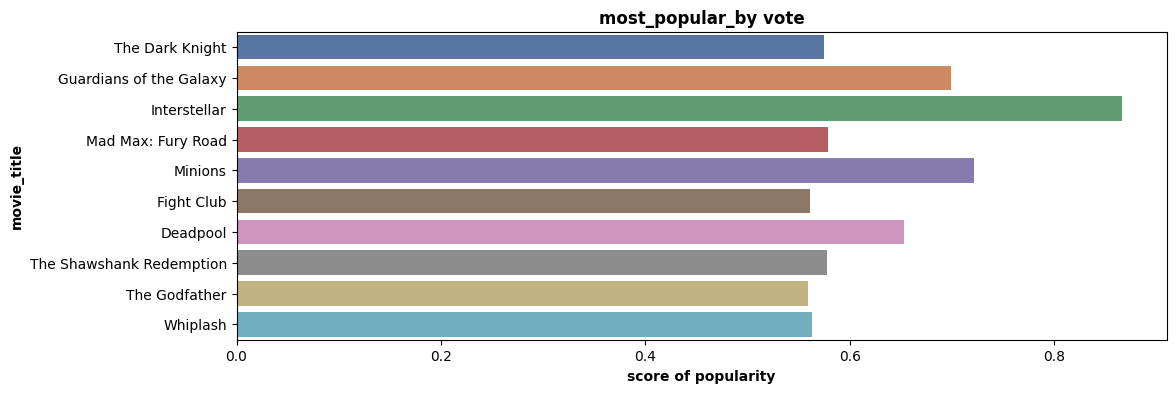

In [22]:
score_df = movie_cleaned.sort_values('score', ascending = False)
plt.figure(figsize=(12,4))
axist=sns.barplot(x = score_df['score'], y = score_df['original_title'].head(10), data = score_df,palette ='deep')
plt.title('most_popular_by vote',weight = 'bold')
plt.xlabel('score of popularity',weight = 'bold')
plt.ylabel('movie_title', weight = 'bold')
plt.savefig('score.png')

In [23]:
movie_cleaned.head()['overview']

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(min_df = 1,max_features =None,
                     strip_accents ='unicode',analyzer = 'word',token_pattern =r'/w{1,}',
                     ngram_range =(1, 3),
                     stop_words = 'english')

In [25]:
tf

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,'unicode'
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,'english'
,token_pattern,"'/w{1,}'"
,ngram_range,"(1, ...)"


In [26]:
movie_cleaned['overview'] = movie_cleaned['overview'].fillna('')

In [27]:
tf_matrix = tf.fit_transform(movie_cleaned['overview'])

In [28]:
tf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1 stored elements and shape (4803, 1)>

In [29]:
tf_matrix.shape

(4803, 1)

In [30]:
from sklearn.metrics.pairwise import sigmoid_kernel
# compute the sigmoi Kernal
sig = sigmoid_kernel(tf_matrix, tf_matrix)

In [31]:
sig

array([[0.76159416, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
        0.76159416],
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
        0.76159416],
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
        0.76159416],
       ...,
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
        0.76159416],
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
        0.76159416],
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
        0.76159416]], shape=(4803, 4803))

In [32]:
df = pd.DataFrame(sig)

In [33]:
df

,0,1,2,3,4,5,6,7,8,9,...,4793,4794,4795,4796,4797,4798,4799,4800,4801,4802
0,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594
1,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594
2,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594
3,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594
4,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594
4799,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594
4800,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594
4801,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594


In [34]:
indic = pd.Series(movie_cleaned.index, index = movie_cleaned['original_title']).drop_duplicates()

In [35]:
indic

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [36]:
def give_recommendation(title, sig = sig):
  indx =  indic[title]
  sig_scor = list(enumerate(sig[indx]))
  sig_scor = sorted(sig_scor,key = lambda x: x[1],reverse=True)
  sig_scor = sig_scor[1:11]
  movie_indx = [i[0] for i in sig_scor]
  return movie_cleaned['original_title'].iloc[movie_indx]


In [37]:
give_recommendation('Spy Kids')

1     Pirates of the Caribbean: At World's End
2                                      Spectre
3                        The Dark Knight Rises
4                                  John Carter
5                                 Spider-Man 3
6                                      Tangled
7                      Avengers: Age of Ultron
8       Harry Potter and the Half-Blood Prince
9           Batman v Superman: Dawn of Justice
10                            Superman Returns
Name: original_title, dtype: object